In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import albumentations as A
DATA_PATH = '../data/training/'

Verify that the data is correct by visual inspection of the matched patches.

In [2]:
# load data
patches = np.load(DATA_PATH + 'patches.npy')
labels = np.load(DATA_PATH + 'labels.npy')
negatives = np.load(DATA_PATH + 'negatives.npy')

In [45]:
# take random index
idx = np.random.randint(0, len(labels))
# visualize patch and subsequent matches
p = [patches[idx]]
while idx < len(labels):
    idx = labels[idx]
    p.append(patches[idx])
print('Number of matches: {}'.format(len(p)))

Number of matches: 7


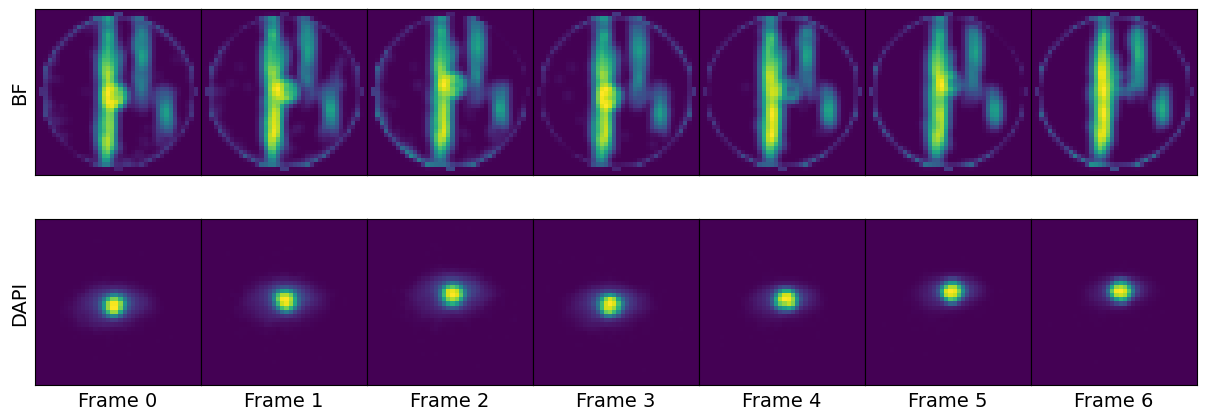

In [46]:
# plot
fig, ax = plt.subplots(2, len(p), figsize=(15, 5), sharex=True)
for i, patch in enumerate(p):
    
    ax[0,i].imshow(patch[0])
    ax[0,i].xaxis.set_ticks([])
    ax[0,i].yaxis.set_ticks([])
    ax[1,i].imshow(patch[1])
    ax[1,i].xaxis.set_ticks([])
    ax[1,i].yaxis.set_ticks([])
    # label x-Axis with frame i
    ax[1,i].set_xlabel('Frame {}'.format(i), fontsize=14)

# adjust the space between subplots
    
ax[0,0].set_ylabel('BF', fontsize=14)
ax[1,0].set_ylabel('DAPI', fontsize=14)
plt.subplots_adjust(wspace=1e-8)

# save figure
plt.savefig('/home/richard/Documents/matches.png', bbox_inches='tight')

### Augmentations

In [14]:
transform = A.OneOf([
    A.RandomResizedCrop(40,40, scale=(0.6, 0.8), p=1),
    A.CoarseDropout(
                    max_holes=8,
                    max_height=6,
                    max_width=6,
                    min_holes=5,
                    min_height=3,
                    min_width=3,
                    fill_value=0,
                    p=1,
    ),
    A.GridDistortion(p=1, distort_limit=0.1),
    A.ElasticTransform(p=1, alpha=60, sigma=500 * 0.05, alpha_affine=60 * 0.03)
], p=1)

In [21]:
transform = A.Compose([
    A.ElasticTransform(p=1, alpha=60, sigma=500 * 0.05, alpha_affine=60 * 0.03)
], p=1)
sample = p[0][0]
sample = transform(image=sample)["image"]

(-0.5, 39.5, 39.5, -0.5)

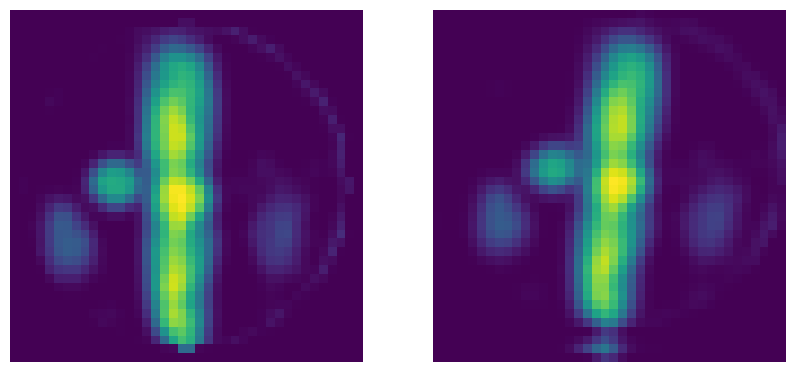

In [22]:
# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(p[0][0])
ax[0].axis('off')
ax[1].imshow(sample)
ax[1].axis('off')